In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from tqdm import tqdm

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import plotly.offline as py 
import plotly.graph_objs as go 
import plotly
py.init_notebook_mode(connected=True)

In [2]:
train = pd.read_json('statoil-iceberg-classifier-challenge/data_train/processed/train.json')
test = pd.read_json('statoil-iceberg-classifier-challenge/data_test/processed/test.json')


In [3]:
train

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0
...,...,...,...,...,...
1599,04e11240,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712077999999998, ...",na,0
1600,c7d6f6f8,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",na,0
1601,bba1a0f1,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",na,0
1602,7f66bb44,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",na,0


In [4]:

test

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874
...,...,...,...,...
8419,16ee9b50,"[-25.082357, -26.71583, -24.599827, -25.082571...","[-25.860718, -23.29442, -25.860861, -25.334354...",34.795500
8420,5a599eb7,"[-21.031391143798828, -21.031391143798828, -21...","[-23.755836486816406, -23.755836486816406, -23...",32.246683
8421,df30d6dd,"[-28.609278, -26.514626, -26.514679, -26.83061...","[-28.609278, -29.437183, -30.35239, -31.375494...",39.503200
8422,18af95b1,"[-27.068821, -27.068892, -23.970854, -22.38730...","[-29.991381, -29.163599, -24.886002, -27.71266...",33.638000


In [5]:
#Generate the training data 
#Create 3 bands having HH, HV, avg of both 
X_band_1 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_1']])
X_band_2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in train['band_2']])
#Use 'np.concatenate' to make a new channel for a color image 
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

X_band_test_1 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in test['band_1']])
X_band_test_2 = np.array([np.array(band).astype(np.float32).reshape(75,75) for band in test['band_2']])

X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis],
                         X_band_test_2[:, :, :, np.newaxis],
                         ((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import pylab

#Take a look at a iceberg
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    fig.write_html("file2.html")
    py.iplot(fig)
print(X_band_1[12,:,:].shape)
plotmy3d(X_band_1[12,:,:], 'iceberg')


(75, 75)


In [7]:
import plotly.express as px

fig =px.scatter(x=range(10), y=range(10))
fig.write_html("file.html")

In [8]:

def get_scaled_imgs(df):
    imgs = []
    label =[]

    for i, row in tqdm(df.iterrows()):
        #make 75x75 image
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 + band_2 # plus since log(x*y) = log(x) + log(y)

        # Rescale
        a = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())
        b = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())
        c = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())
        img = np.dstack((a, b, c))
        img = (img +1)
        img = (img * 100).astype(np.uint8)
        imgs.append(img)
        label.append(np.array(row['is_iceberg']))

    return np.array(imgs),np.array(label)

In [9]:
data,target=get_scaled_imgs(train)

1604it [00:08, 181.13it/s]


1


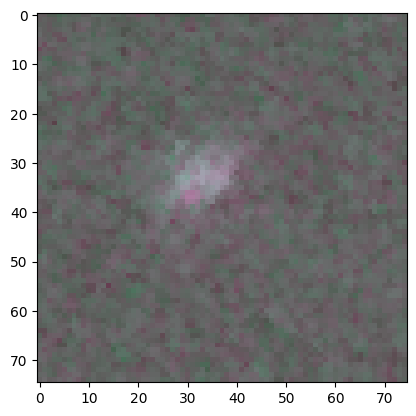

In [10]:
img_ind = 5
print(target[img_ind])
plt.imshow(data[img_ind])

In [11]:
data[img_ind].shape

(75, 75, 3)

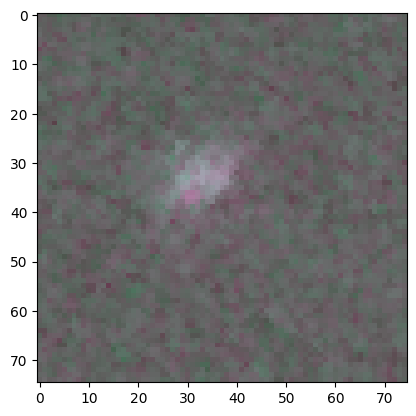

In [12]:
im_temp = Image.fromarray(data[img_ind] )
im_temp.save("test_image.png")
im_load = np.array(Image.open("test_image.png"))
plt.imshow(im_load)

In [13]:
type(data[img_ind])

numpy.ndarray

In [14]:
type(im_load)

numpy.ndarray

In [ ]:
main_dir="Iceberg_Dataset"
iceberg_dir = main_dir+"/iceberg"
no_iceberg_dir = main_dir+"/noiceberg"
os.mkdir(main_dir)
os.mkdir(iceberg_dir)
os.mkdir(no_iceberg_dir)

In [16]:
len(data)

1604

In [17]:

counter = 0

for img,label in tqdm(zip(data, target)):
    counter += 1
    im = Image.fromarray(img)

    if label == 1:
        imgname = "1_"+str(counter)+".png"
        im.save(iceberg_dir+"/"+imgname)
    else:
        imgname = "0_"+str(counter)+".png"
        im.save(no_iceberg_dir+"/"+imgname)
    
        
print("Dataset Ready")

1604it [00:05, 317.60it/s]

Dataset Ready


In [18]:
data1 = []
target1 = []

for i in os.listdir("Iceberg_Dataset/iceberg/"):
    if ".png" in i:

        im_array = np.array(Image.open("Iceberg_Dataset/iceberg/"+i))
        data1.append(im_array)
        target1.append(1)

for i in os.listdir("Iceberg_Dataset/noiceberg/"):
    if ".png" in i:
        im_array = np.array(Image.open("Iceberg_Dataset/noiceberg/"+i))
        data1.append(im_array)
        target1.append(0)

In [19]:
type(data1[0])

numpy.ndarray

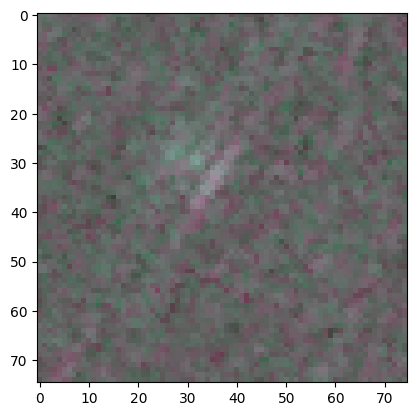

In [20]:
plt.imshow(data1[0])

In [21]:
data1 = np.array(data1)
target1 = np.array(target1)

data1.shape

(1604, 75, 75, 3)